In [1]:
import numpy as np
from astropy.io import fits
from scipy.ndimage import rotate

In [2]:
# Reading FITS file
hdu = fits.open("../maps_fits/b'iDR4_3_MC0114_0562811'_halpha_v1.fits")
data_haNii = hdu[0].data

In [3]:
# Define the pseudo-slit coordinates
y_start, y_end = 30, 32
x_start, x_end = 20, 40
slit_mask = np.zeros_like(data_haNii)
slit_mask[y_start:y_end, x_start:x_end] = 1  # Setting pixels within the slit region to 1

# Set the rotation angle
angle = 45 # Set the desired rotation angle in degrees

# Rotate the FITS data by the specified angle
rotated_data = rotate(data_haNii, angle, reshape=False)

# Rotate the slit mask
slit_mask_rotated = rotate(slit_mask, angle, reshape=False)

flux_within_slit = np.sum(rotated_data * slit_mask)

print("Flux within the pseudo-slit:", rotated_data * slit_mask)
print("Maximum flux within the pseudo-slit:", (rotated_data * slit_mask).max())
print("Total flux within the pseudo-slit:", flux_within_slit)

Flux within the pseudo-slit: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Maximum flux within the pseudo-slit: 2.897343e-14
Total flux within the pseudo-slit: 2.6401472e-13


In [4]:
flux_within_slit1 = np.sum(data_haNii* slit_mask_rotated)
print("Flux within the pseudo-slit:",  data_haNii* slit_mask_rotated)
print("Maximum flux within the pseudo-slit:", (data_haNii * slit_mask_rotated ).max())
print("Total flux within the pseudo-slit:", flux_within_slit1)

Flux within the pseudo-slit: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Maximum flux within the pseudo-slit: 3.0228946e-14
Total flux within the pseudo-slit: 2.684287e-13


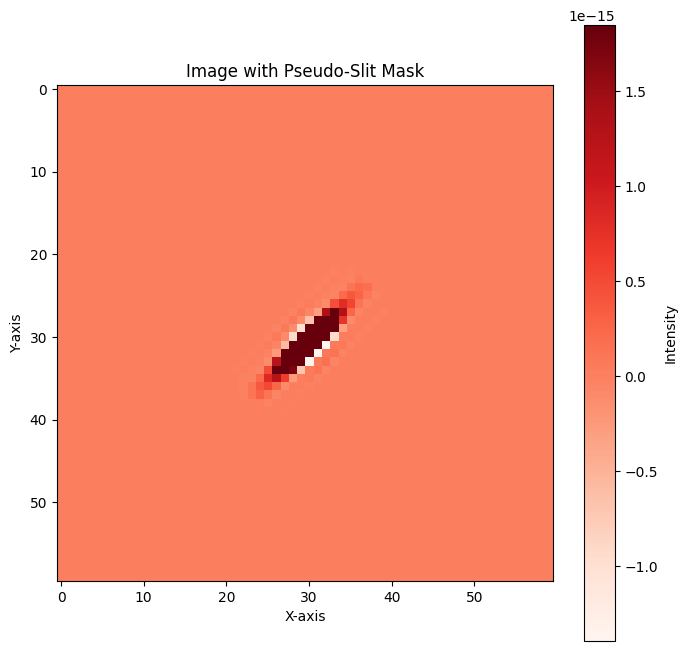

In [5]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

# Assuming you have an HDU object named hdu containing your FITS data
# Assuming you have created the slit_mask as shown in the previous code snippet


# Plot the image
plt.figure(figsize=(8, 8))
# show the image
m, s = np.mean(hdu[0].data), np.std(hdu[0].data)
#plt.imshow(data_haNii, cmap='viridis', vmin=m-s, vmax=m+s, origin='lower')  # Adjust vmin and vmax as needed

# Overlay the pseudo-slit mask on the image
plt.imshow(slit_mask_rotated*data_haNii, cmap='Reds', vmin=m-s, vmax=m+s, alpha=1)  # Adjust alpha for transparency

plt.colorbar(label='Intensity')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Image with Pseudo-Slit Mask')
plt.show()

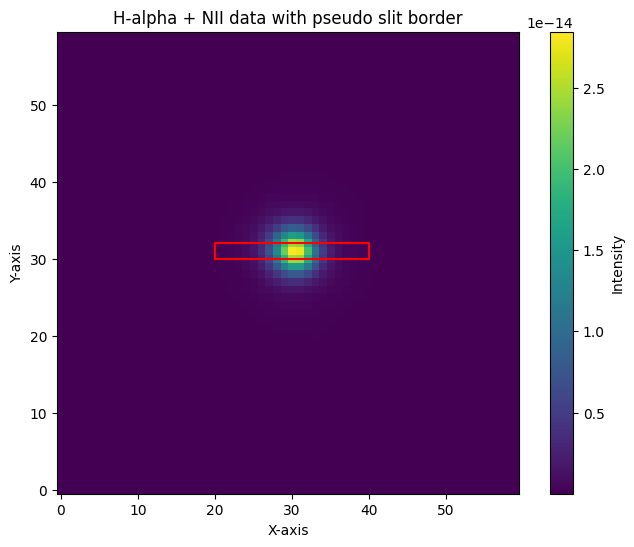

In [6]:
# Plot the pseudo-slit and its border as a rectangle
plt.figure(figsize=(8, 6))

# Display the H-alpha + NII data
plt.imshow(data_haNii, cmap='viridis', origin='lower')

# Plot the borders of the pseudo slit as a rectangle
plt.plot([x_start, x_end, x_end, x_start, x_start], [y_start, y_start, y_end, y_end, y_start], color='red')

plt.colorbar(label='Intensity')
plt.title('H-alpha + NII data with pseudo slit border')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()

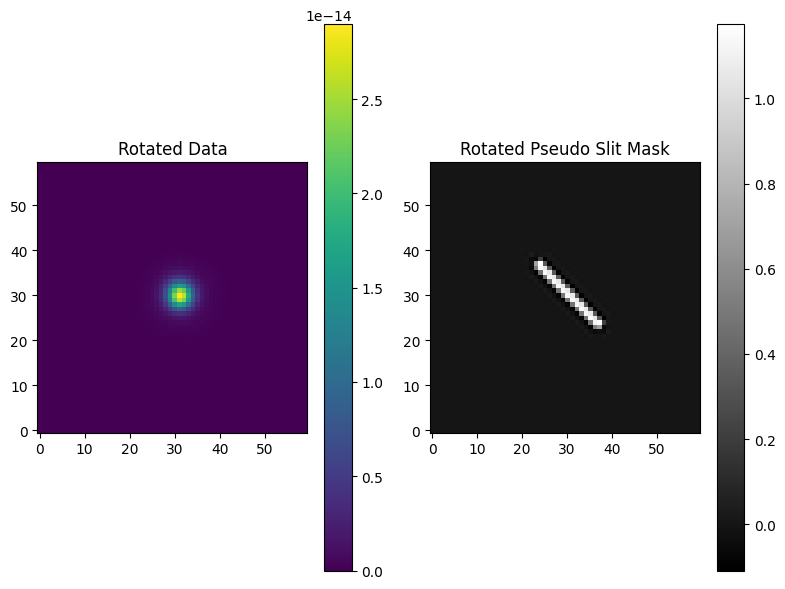

In [7]:
# Plot the rotated data with the pseudo slit mask
plt.figure(figsize=(8, 6))

plt.subplot(121)
plt.imshow(rotated_data, cmap='viridis', origin='lower')
plt.title('Rotated Data')
plt.colorbar()

plt.subplot(122)
plt.imshow(slit_mask_rotated, cmap='gray', origin='lower')
plt.title('Rotated Pseudo Slit Mask')
plt.colorbar()

plt.tight_layout()
plt.show()

In [8]:
from matplotlib.patches import Rectangle
# Create the pseudo-slit rectangle
slit_rectangle = Rectangle((x_start, y_start), x_end - x_start, y_end - y_start, linewidth=1, edgecolor='red', facecolor='none')

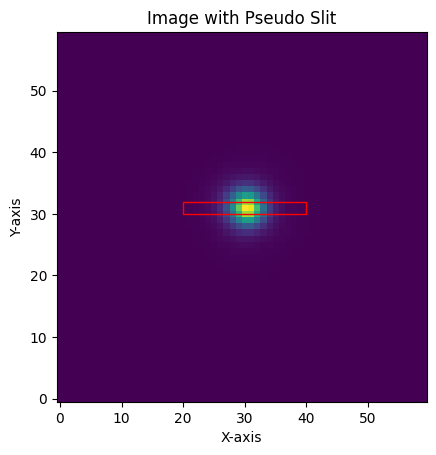

In [9]:
# Create a plot
fig, ax = plt.subplots()
ax.imshow(data_haNii, cmap='viridis', origin='lower')
ax.add_patch(slit_rectangle)

ax.set_title('Image with Pseudo Slit')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.show()

In [10]:
# Create the pseudo-slit rectangle coordinates
vertices = np.array([[x_start, y_start], [x_end, y_start], [x_end, y_end], [x_start, y_end]])
# Rotate the rectangle coordinates
center = np.mean(vertices, axis=0)
rotated_vertices = rotate(vertices - center, angle, reshape=False) + center


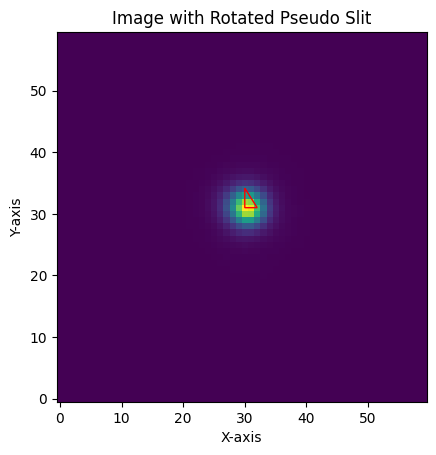

In [11]:
from matplotlib.patches import Polygon
# Create a plot
fig, ax = plt.subplots()
ax.imshow(data_haNii, cmap='viridis', origin='lower')
ax.add_patch(Polygon(rotated_vertices, closed=True, edgecolor='red', facecolor='none'))

ax.set_title('Image with Rotated Pseudo Slit')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.show()

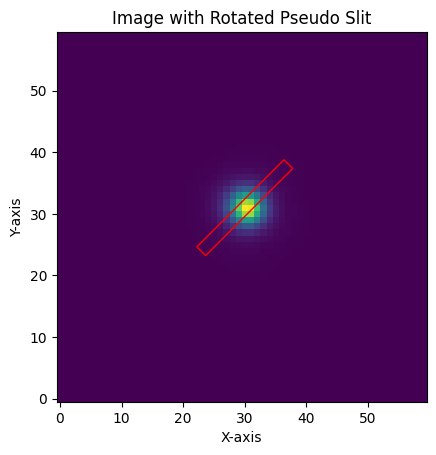

In [18]:
from matplotlib.transforms import Affine2D
# Create the pseudo-slit rectangle
pseudo_slit = Rectangle((x_start, y_start), x_end - x_start, y_end - y_start, angle=0, edgecolor='red', facecolor='none')

# Create a plot
fig, ax = plt.subplots()
ax.imshow(data_haNii, cmap='viridis', origin='lower')
ax.add_patch(pseudo_slit)

# Apply rotation without changing position
trans = Affine2D().rotate_deg_around(x_start + (x_end - x_start) / 2, y_start + (y_end - y_start) / 2, 45)
pseudo_slit.set_transform(trans + ax.transData)


ax.set_title('Image with Rotated Pseudo Slit')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.show()

In [16]:
import aplpy

INFO: Auto-setting vmin to -1.843e-15 [aplpy.core]
INFO: Auto-setting vmax to  2.058e-14 [aplpy.core]


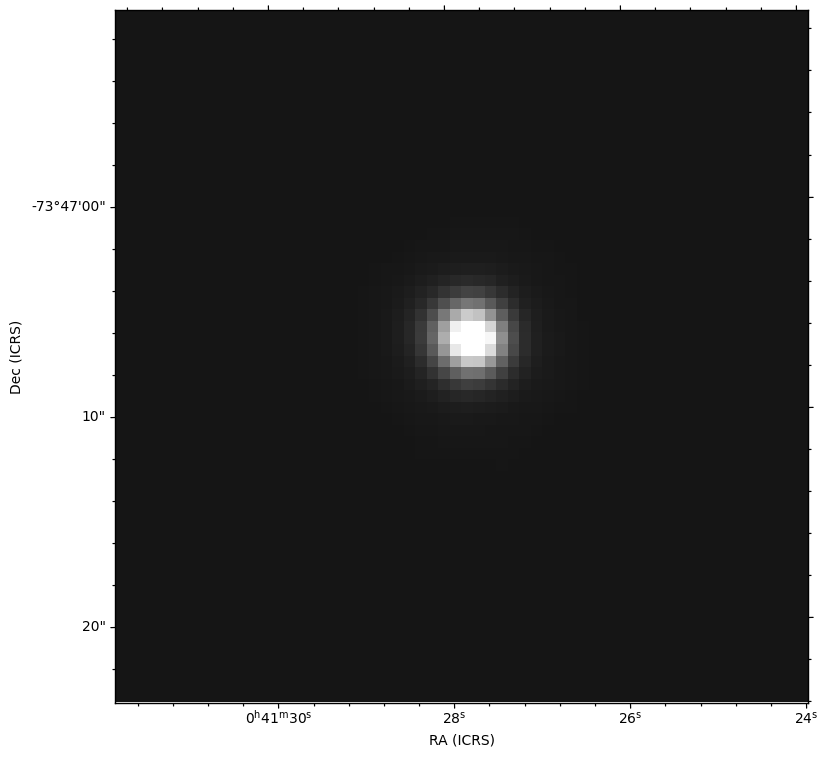

In [17]:
# Create an APLpy figure
fig = aplpy.FITSFigure("../maps_fits/b'iDR4_3_MC0114_0562811'_halpha_v1.fits")

# Show the image
fig.show_grayscale(stretch='linear')

## Overlay the pseudo slit
fig.show_rectangles([x_start], [y_start], [x_end - x_start], [y_end - y_start], edgecolor='red')
# Save the figure
#fig.save('image_with_pseudo_slit.png')